___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Linear Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [3]:
customers = pd.read_csv('Ecommerce Customers')


**Check the head of customers, and check out its info() and describe() methods.**

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

In [8]:
sns.set_style('darkgrid')

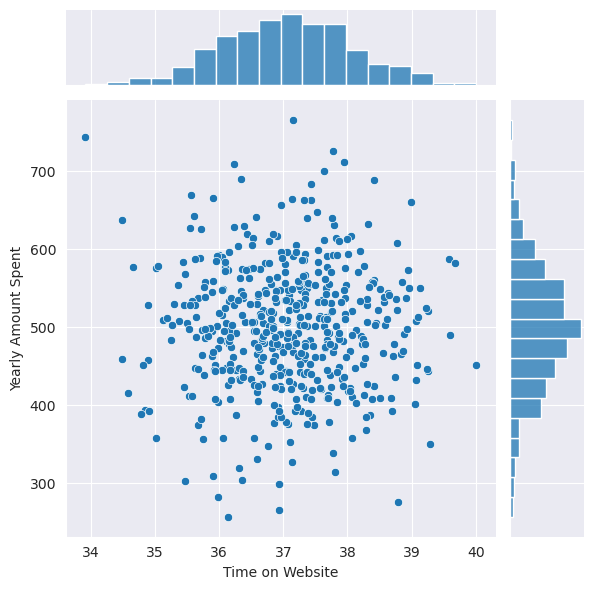

In [9]:
sns.jointplot(
    x='Time on Website',
    y='Yearly Amount Spent',
    data=customers,
)


** Do the same but with the Time on App column instead. **

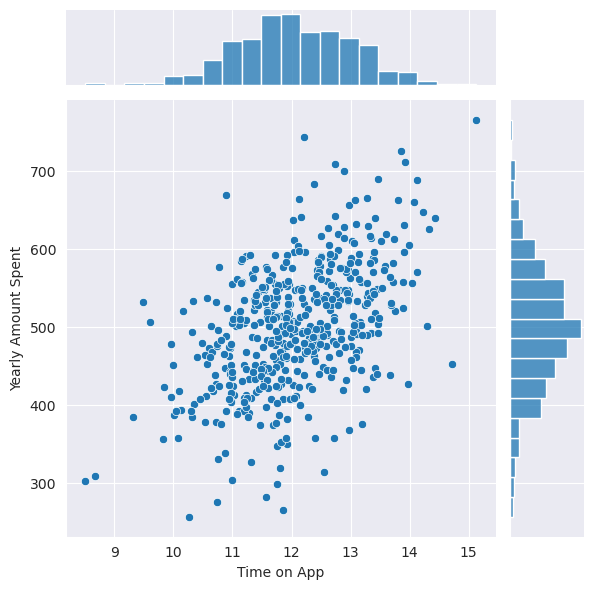

In [10]:
sns.jointplot(
    x='Time on App',
    y='Yearly Amount Spent',
    data=customers,
)

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

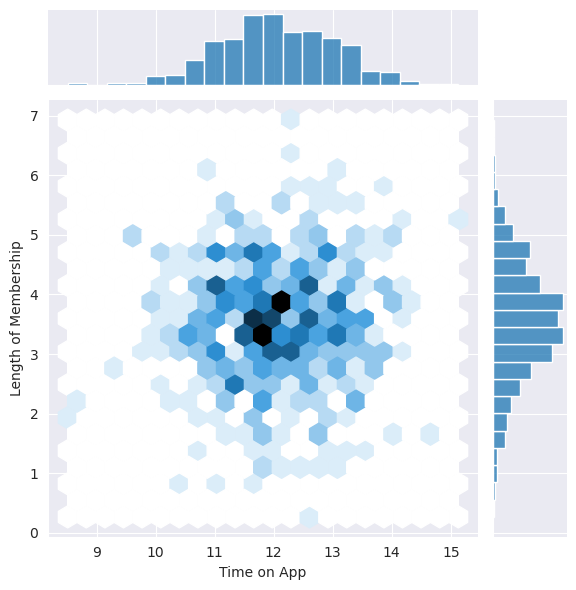

In [11]:
sns.jointplot(
  x='Time on App',
  y='Length of Membership',
  data=customers,
  kind='hex',
)

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

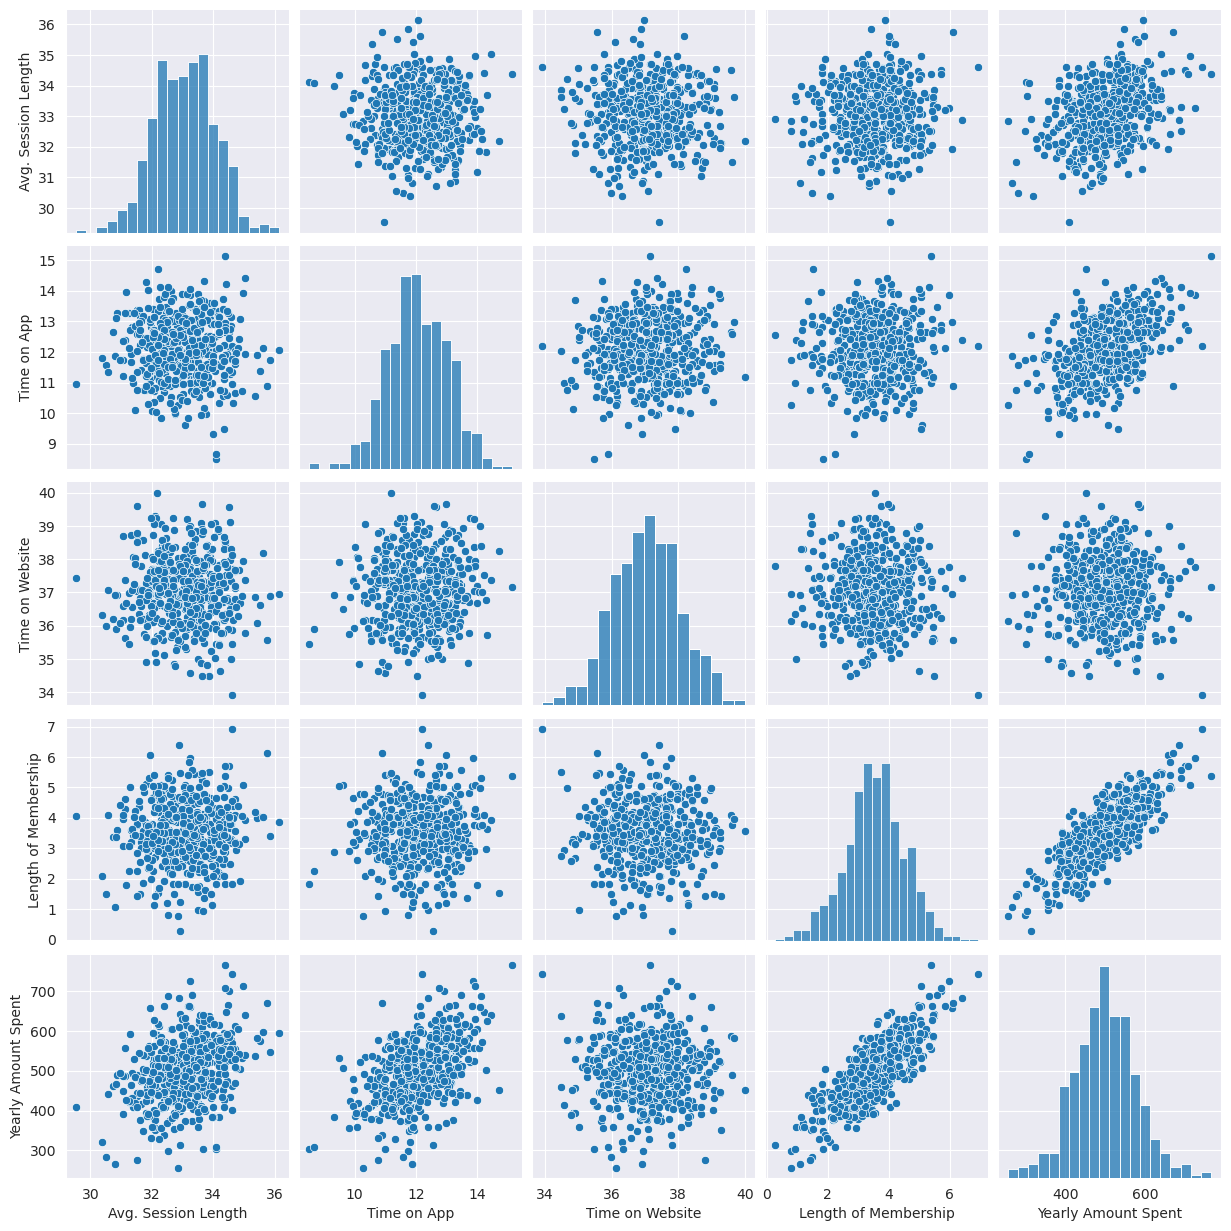

In [12]:
sns.pairplot(
  data=customers,
)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

The **length of membership** looks to be the most correlated feature with Yearly Amount Spent

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

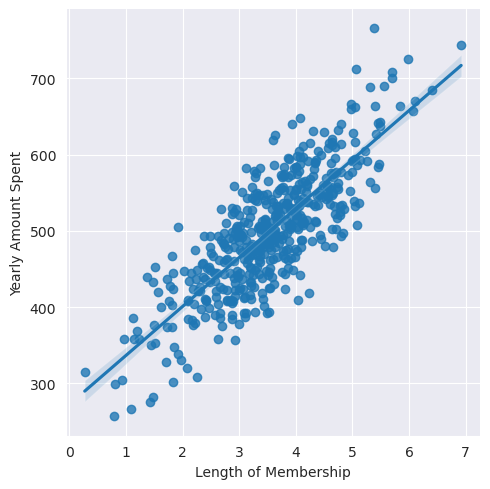

In [13]:
sns.lmplot(
  x='Length of Membership',
  y='Yearly Amount Spent',
  data=customers,
)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [14]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [16]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [17]:
Y = customers['Yearly Amount Spent']
Y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [18]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(
  X,
  Y,
  test_size=0.3,
  random_state=101,
)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [21]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [23]:
lm = LinearRegression()
lm

LinearRegression()

** Train/fit lm on the training data.**

In [24]:
lm.fit(X_train, Y_train)

LinearRegression()

**Print out the coefficients of the model**

In [25]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [26]:
X_train.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [40]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df


,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [28]:
predictions = lm.predict(X_test)
predictions

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

** Create a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Y')

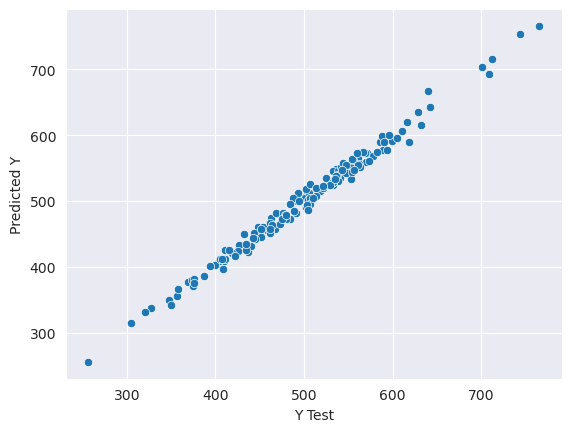

In [32]:
sns.scatterplot(
  x=Y_test,
  y=predictions,
)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [35]:
from sklearn import metrics

In [36]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 7.228148653430813
MSE: 79.81305165097402
RMSE: 8.93381506697861


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

In [38]:
(Y_test - predictions)

18    -4.126186
361   -1.686918
104    0.816457
4      7.975058
156   -3.858503
         ...   
147    1.431172
346    3.977230
423    3.521249
17    -3.822028
259   -0.080551
Name: Yearly Amount Spent, Length: 150, dtype: float64

<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

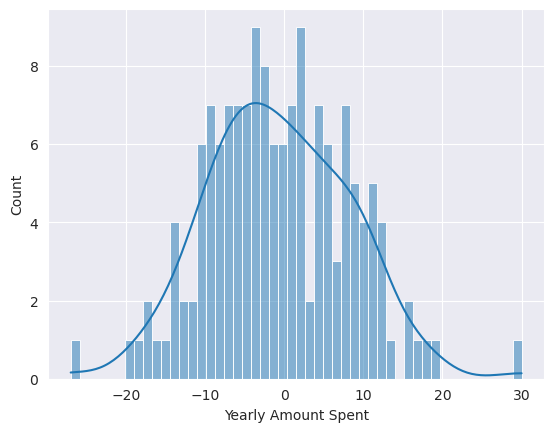

In [37]:
# Residuals, difference between the real test values and the predicted values
sns.histplot(
  (Y_test - predictions),
  bins=50,
  kde=True,
)

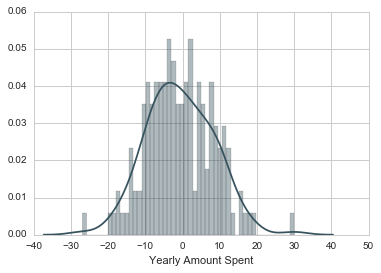

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [41]:
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** How can you interpret these coefficients? **

*Answer here*

**Do you think the company should focus more on their mobile app or on their website?**

*Answer here*

The membership time represents the most influencial factor in the yearly amount spent of all factors so old customer spend more money than new ones.

Since the company needs to decide whether to focus resources on the App or The Website.

The **Time on App** makes a bigger impact on the **Yearly Amount Spent** than the **Time on Website** so the company should focus on the App.

The **Time on App** has 203 times more impact on the **Yearly Amount Spent** than the **Time on Website**.

### Still the new question is , should we try to better the web so it can catch up to the app or should we develop the app more since that is what is working better?

In [44]:
38.59 / 0.19

203.10526315789474

## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.

## Relation between time on app and length of membership

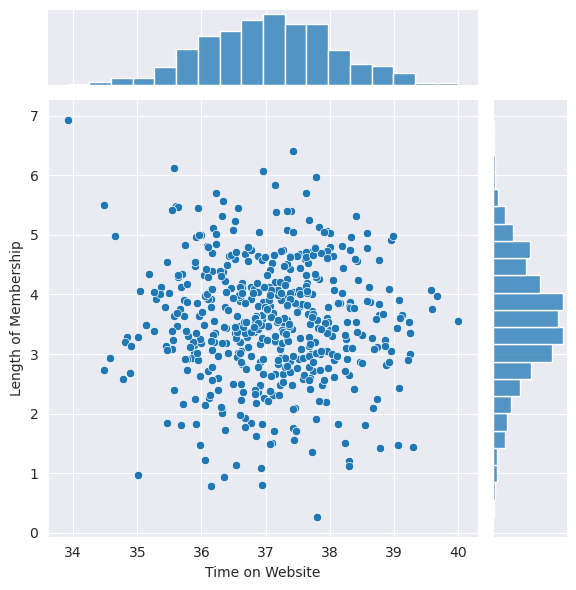

In [45]:
sns.jointplot(
    x='Time on Website',
    y='Length of Membership',
    data=customers,
)

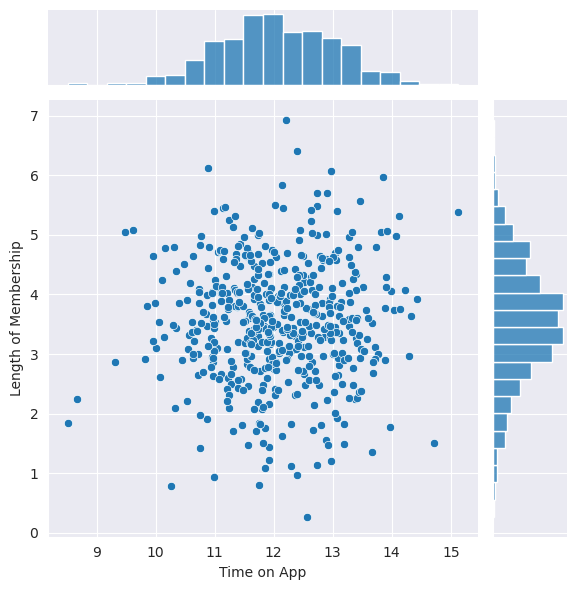

In [46]:
sns.jointplot(
    x='Time on App',
    y='Length of Membership',
    data=customers,
)

In [47]:
Y_time = customers['Length of Membership']
Y_time

0      4.082621
1      2.664034
2      4.104543
3      3.120179
4      4.446308
         ...   
495    3.746573
496    3.576526
497    4.958264
498    2.336485
499    2.735160
Name: Length of Membership, Length: 500, dtype: float64

In [48]:
X_time = customers[[
    'Avg. Session Length', 'Time on App', 'Time on Website',
]]
X_time

,Avg. Session Length,Time on App,Time on Website
0,34.497268,12.655651,39.577668
1,31.926272,11.109461,37.268959
2,33.000915,11.330278,37.110597
3,34.305557,13.717514,36.721283
4,33.330673,12.795189,37.536653
...,...,...,...
495,33.237660,13.566160,36.417985
496,34.702529,11.695736,37.190268
497,32.646777,11.499409,38.332576
498,33.322501,12.391423,36.840086


In [49]:
X_train_time, X_test_time, Y_train_time, Y_test_time = train_test_split(
    X_time,
    Y_time,
    test_size=0.3,
    random_state=101,
)


In [50]:
lm_time = LinearRegression()

In [51]:
lm_time.fit(X_train_time, Y_train_time)


LinearRegression()

In [52]:
predictions_time = lm_time.predict(X_test_time)
predictions_time

array([3.55809668, 3.33941187, 3.3966044 , 3.55599232, 3.52184384,
       3.5622011 , 3.6442029 , 3.62763208, 3.61182414, 3.50782694,
       3.48622948, 3.61919656, 3.48925822, 3.56960127, 3.7001931 ,
       3.58400112, 3.65661925, 3.53792626, 3.63099207, 3.60379057,
       3.37414535, 3.63212119, 3.53381381, 3.52311046, 3.60843696,
       3.4624956 , 3.58309506, 3.4959678 , 3.6087641 , 3.37978952,
       3.60000654, 3.68118918, 3.61685417, 3.65009625, 3.51414269,
       3.47599241, 3.58835907, 3.55357438, 3.61841911, 3.52139884,
       3.60479573, 3.36997292, 3.51785419, 3.58314423, 3.61995139,
       3.63886717, 3.66030534, 3.55399089, 3.50564523, 3.58078948,
       3.51384094, 3.54891003, 3.51683314, 3.51148503, 3.45162081,
       3.55951516, 3.41002916, 3.38416817, 3.46323309, 3.60450473,
       3.52981308, 3.6459458 , 3.76881999, 3.5522058 , 3.55326938,
       3.45329765, 3.48435621, 3.46331982, 3.6466095 , 3.48588414,
       3.63588858, 3.51495546, 3.44084665, 3.57960231, 3.50480

Text(0, 0.5, 'Predicted Y_time')

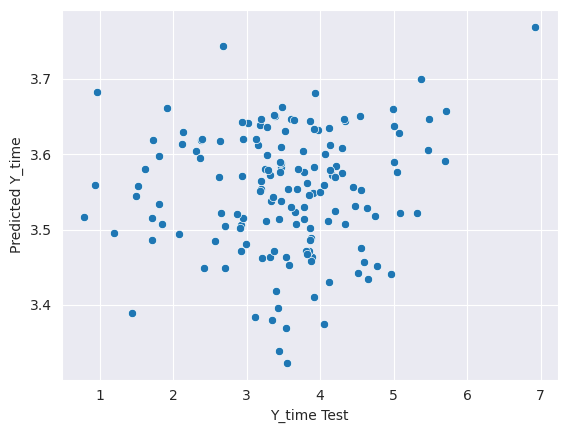

In [55]:
sns.scatterplot(
  x=Y_test_time,
  y=predictions_time,
)
plt.xlabel('Y_time Test')
plt.ylabel('Predicted Y_time')

In [56]:
print('MAE:', metrics.mean_absolute_error(Y_test_time, predictions_time))
print('MSE:', metrics.mean_squared_error(Y_test_time, predictions_time))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test_time, predictions_time)))

MAE: 0.7788882025529685
MSE: 1.0608284867502107
RMSE: 1.0299652842451588


<Axes: xlabel='Length of Membership', ylabel='Count'>

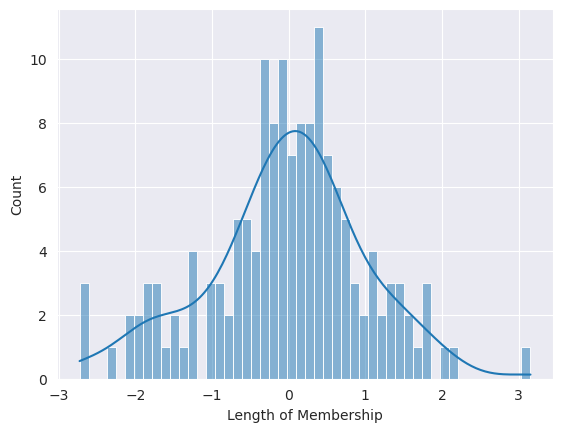

In [57]:
# Residuals, difference between the real test values and the predicted values
sns.histplot(
    (Y_test_time - predictions_time),
    bins=50,
    kde=True,
)

In [58]:
coeff_time_df = pd.DataFrame(lm_time.coef_, X_time.columns, columns=['Coefficient'])
coeff_time_df

,Coefficient
Avg. Session Length,0.030558
Time on App,0.039323
Time on Website,-0.054393


### Should we try to better the web so it can catch up to the app or should we develop the app more since that is what is working better?

We already know the app has a bigger impact on the yearly amount spent than the website.

And the length of membership is the most influencial factor in the yearly amount spent.

Now we wanted to know if the app or the website is more influencial over the length of membership.

What we found out is not only does the app have a bigger impact in increasing the lenght of the membership but also the website has a negative impact on the lenght of the membership.

Meaning that the customers that use the website tend to have a shorter membership than the customers that use the app.

This can mean two things our target audience that we want to engage more use mostly the app.
Or the user experience on the website is not friendly and is driving customers away.

**For this I propose focus the resources to work on the app, and a smaller amount of resources improving the website user experience and at the same time survey the customers that use the website, asking them how could we improve their user experience.**
